In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
import sys
import os

# Exploratory Data Analysis (EDA) 

In [2]:
data = ['CA','GB','US']
sys.path.insert(0, os.path.abspath('../submitted'))
from scripts import project_functions # This is called a relative import
df_lastdate = project_functions.load_and_process(data)

In [3]:
from scripts import project_functions # This is called a relative import
df_assign = project_functions.log(df_lastdate)

C:\Users\skate\miniconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

In [7]:
profiling = pandas_profiling.ProfileReport(df_clean)
profiling

# Heatmap for Major Trending Stats

*The statistics are being logged. Natural logs coefficients on the natural-log scale are directly interpretable as approximate proportional differences: with a coefficient of 0.06, a difference of 1 in x corresponds to an approximate 6% difference in y. This can be seen below:*

<AxesSubplot:>

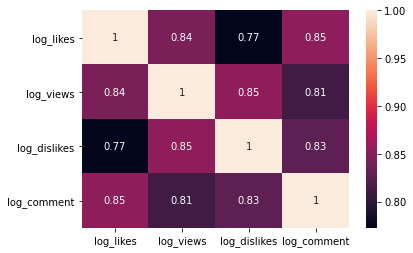

In [7]:
df_assign = df_assign.drop(columns=['ratio'])
sns.heatmap(df_assign.corr(), annot = True)

# Pair Plot for Major Trending Stats

*According to YouTube, the algorithm is basically a “real-time feedback loop that tailors videos to each viewer's different interests.” It decides which videos will get suggested to individual users. The algorithm's goals are twofold: find the right video for each viewer, and get viewers to keep watching.*

*In order to see this in visualization, we can take the correlation coefficient found in the heatmap and apply it to the pair plot below:*

*The distribution is tighter for the correlation between views and likes, this is because the algorithm uses positive quantitative statistics to generate your recommended and utilizes negative quantitative statistics, such as the correlation between dislikes and views suggests, to improve your recommended by utilizing the fact that dislikes are a negative descriptive statistic.*

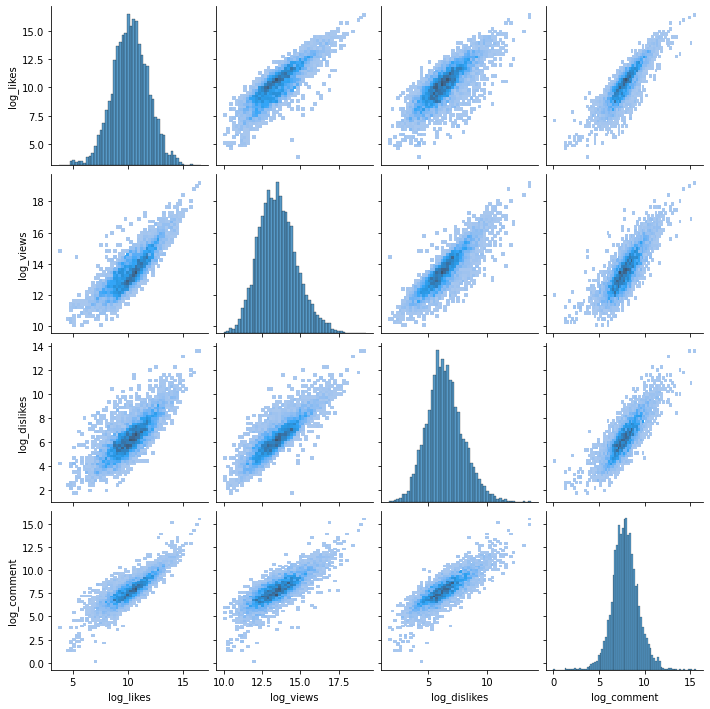

In [11]:
sns.pairplot(df_assign, kind="hist")

# Logged lmplot for log_likes against log_views

*This is a plot for showing the likes to views ratio per category. This plot was purposefully overplotted to see where the bulk of likes and views were per category, showing a tight distribution of view to like ratio per category, which shows that for generally more popular categories, there are subsequently more views and likes.*

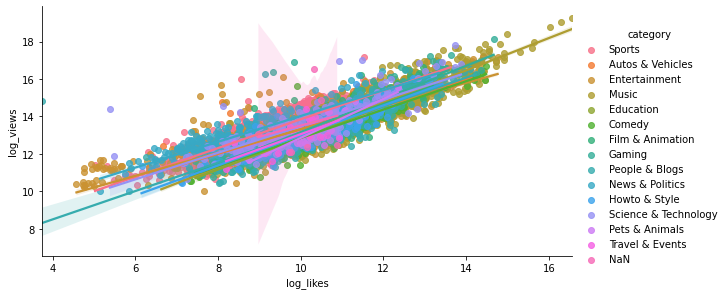

In [9]:
sns.lmplot(x="log_likes", y="log_views",hue="category", data=df_assign, height=4, aspect=2, palette="husl")

# Logged Violin Plot for likes against category

*This plot gives us a valueable evaluation of likes per category, showing which categories have a distribution that show an inclination to be trending and also in which category the most likes are.*

<AxesSubplot:xlabel='log_likes', ylabel='category'>

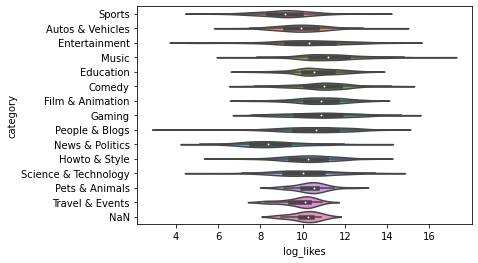

In [10]:
sns.violinplot(x="log_likes", y="category", data=df_assign)

# Things inside Project Function

In [ ]:
# load into single
df = pd.concat([pd.read_csv(pathCA),
                pd.read_csv(pathGB),
                pd.read_csv(pathUS)])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])

#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')

